<a href="https://colab.research.google.com/github/tapomay2006-boop/launched/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
#importing important modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [227]:
#loading dataset
df = pd.read_csv("play_tennis_dataset.csv")


In [228]:
import warnings
warnings.filterwarnings('ignore')

In [229]:
#doing EDA
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

  Day   Outlook Temperature Humidity    Wind Play
0  D1  Overcast        Mild   Normal  Strong  Yes
1  D2     Sunny        Mild   Normal  Strong  Yes
2  D3       NaN        Mild     High  Strong   No
3  D4     Sunny        Mild     High    Weak  Yes
4  D5     Sunny        Cool   Normal  Strong  Yes
(6666, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          6666 non-null   object
 1   Outlook      6267 non-null   object
 2   Temperature  6333 non-null   object
 3   Humidity     6433 non-null   object
 4   Wind         6300 non-null   object
 5   Play         6666 non-null   object
dtypes: object(6)
memory usage: 312.6+ KB
None
         Day   Outlook Temperature Humidity  Wind  Play
count   6666      6267        6333     6433  6300  6666
unique    31         3           3        2     2     2
top       D1  Overcast        Cool   Norm

In [230]:
#dropping day column as not required and checking head once again
df = df.drop('Day', axis=1)
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Overcast,Mild,Normal,Strong,Yes
1,Sunny,Mild,Normal,Strong,Yes
2,NaN,Mild,High,Strong,No
3,Sunny,Mild,High,Weak,Yes
4,Sunny,Cool,Normal,Strong,Yes


In [231]:
#checking missing values
print(df.isnull().sum())

Outlook        399
Temperature    333
Humidity       233
Wind           366
Play             0
dtype: int64


In [232]:
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [233]:
#checking missing values
print(df.isnull().sum())

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64


In [234]:
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlook'] = le.fit_transform(df['Outlook'])
df['Humidity'] = le.fit_transform(df['Humidity'])
df['Wind'] = le.fit_transform(df['Wind'])
df['Play'] = le.fit_transform(df['Play'])
df['Temperature'] = le.fit_transform(df['Temperature'])
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,0,2,1,0,1
1,2,2,1,0,1
2,0,2,0,0,0
3,2,2,0,1,1
4,2,0,1,0,1


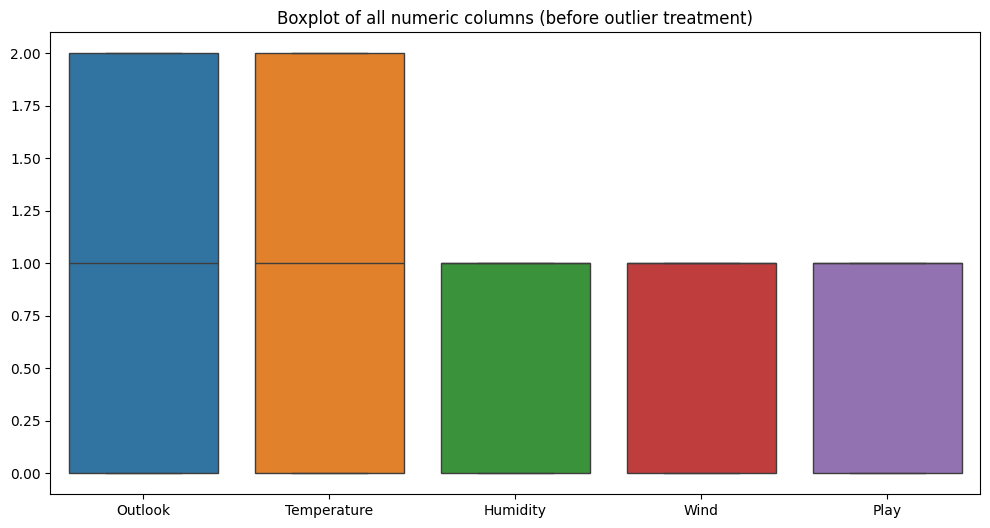

In [235]:
#checking outliers (all columns in one figure)
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of all numeric columns (before outlier treatment)")
plt.show()


<Figure size 800x400 with 0 Axes>

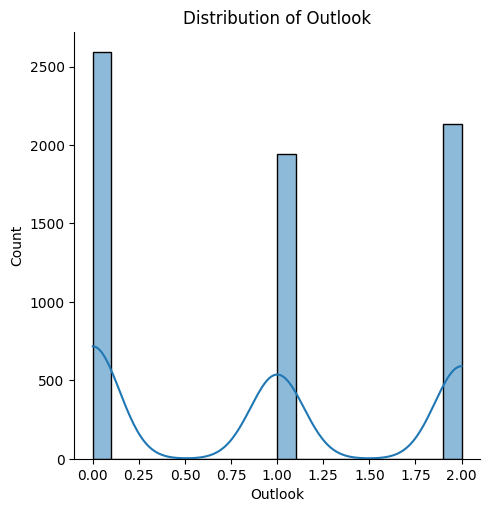

<Figure size 800x400 with 0 Axes>

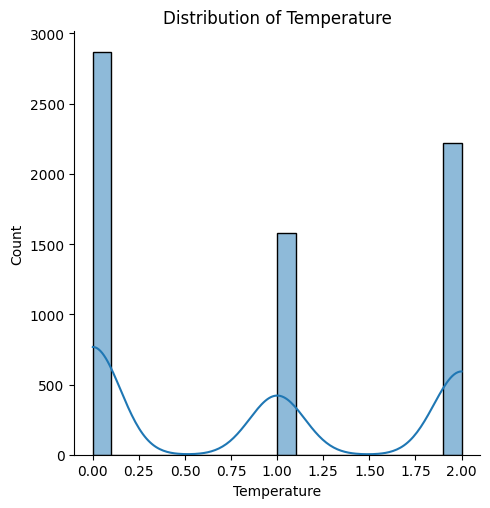

<Figure size 800x400 with 0 Axes>

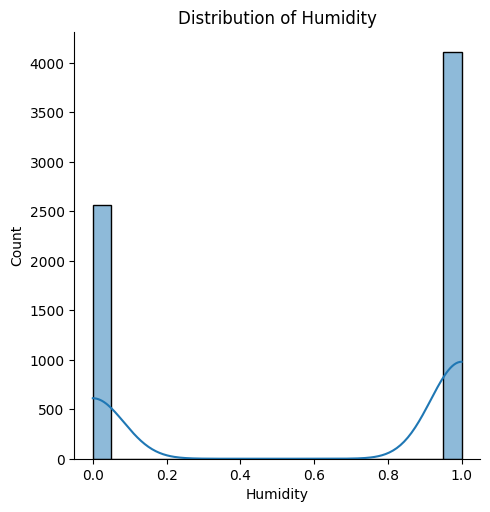

<Figure size 800x400 with 0 Axes>

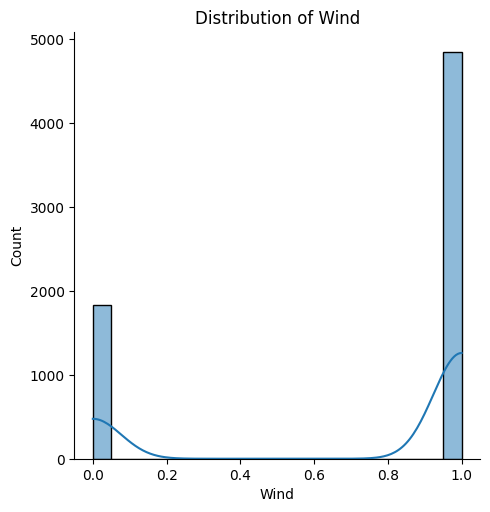

<Figure size 800x400 with 0 Axes>

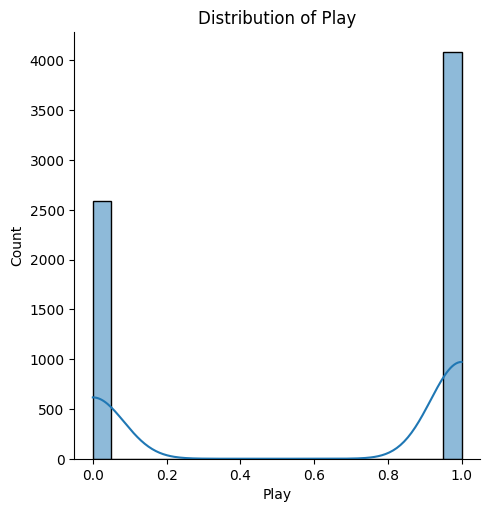

In [236]:
#univariate analysis
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.displot(df[column], bins=20, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


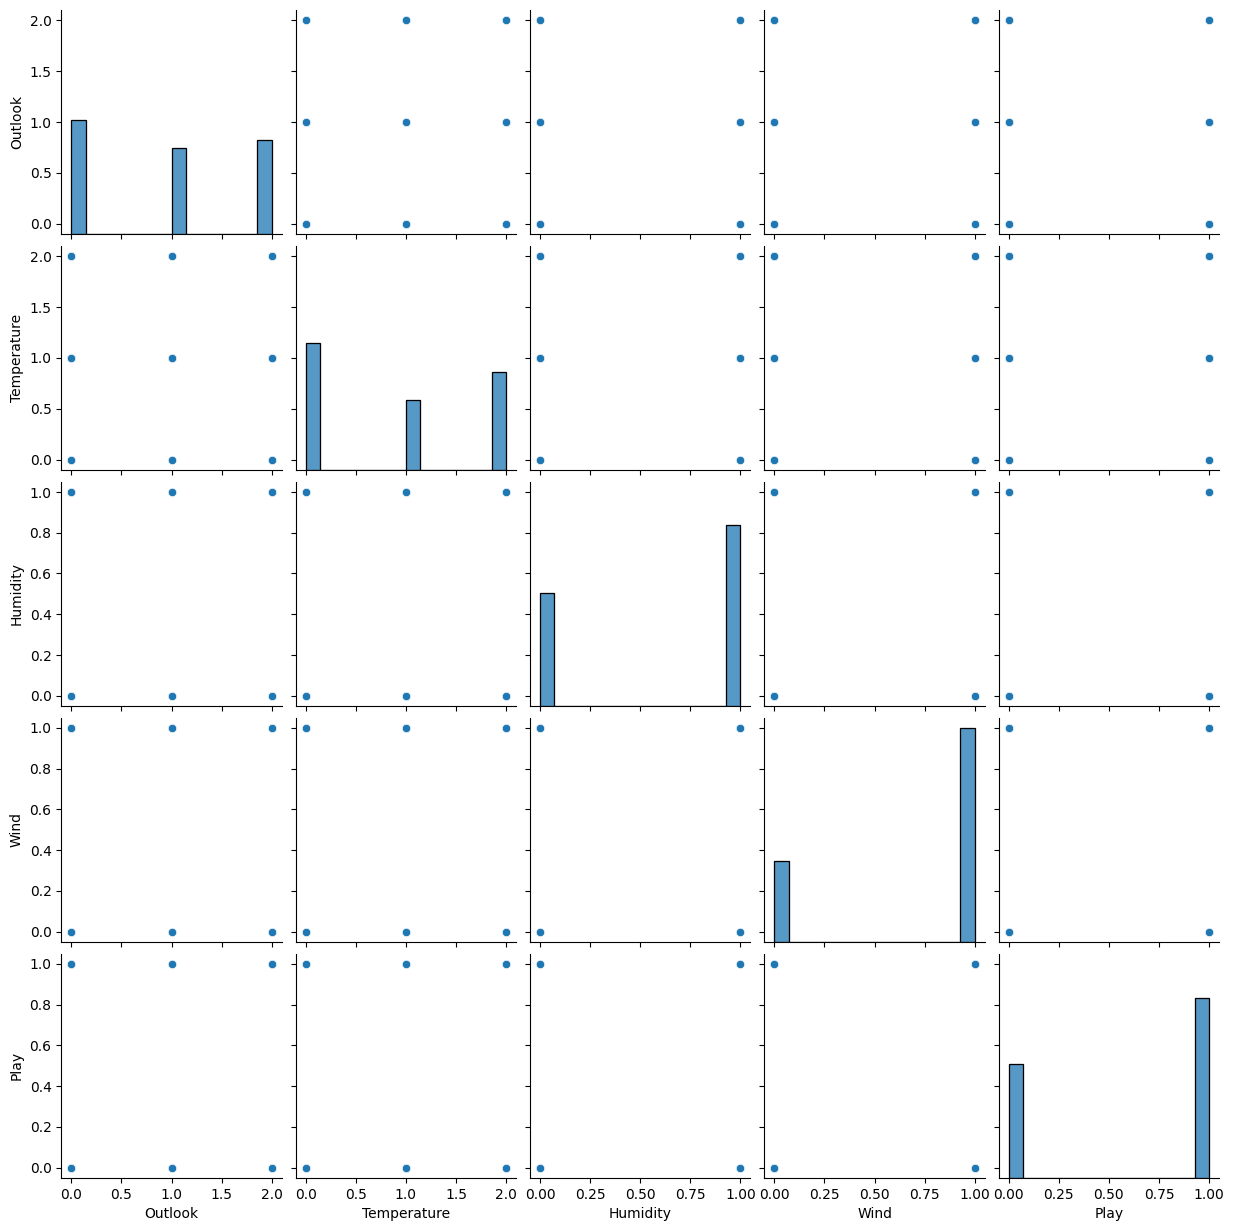

In [237]:

#bivariate analysis
sns.pairplot(df)
plt.show()

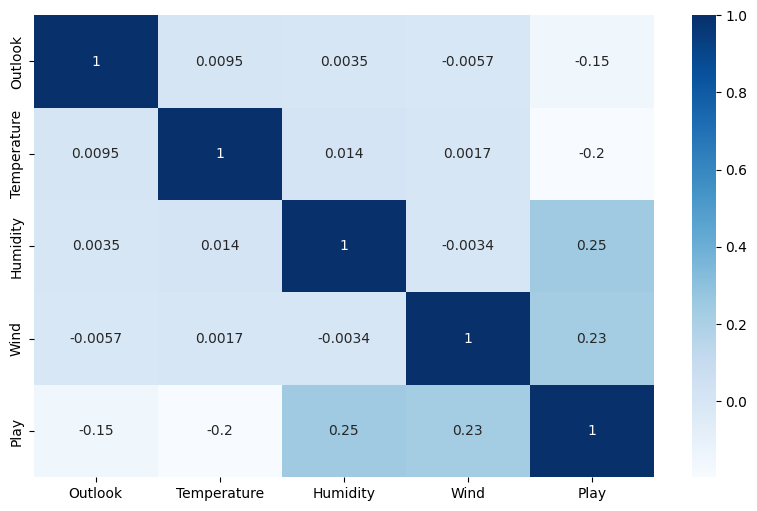

In [238]:
#heatmap plot of correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

In [239]:
#seperating target variable
x=df.drop('Play',axis=1)
y=df['Play']


In [240]:
#splitting into test ansd train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [241]:
#grid search cv for random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid={
    'n_estimators':[100,200,300,10,50,100,200],
    'criterion':['gini','entropy']

}
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300, 10, 50, 100, 200]})

In [242]:
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [243]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion="gini")
rf.fit(x_train,y_train)

RandomForestClassifier()

In [244]:
#predict test dataset
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [245]:
#score of train dataset
rf.score(x_train,y_train)

0.8233308327081771

In [246]:
#score of test data
rf.score(x_test,y_test)

0.8133433283358321

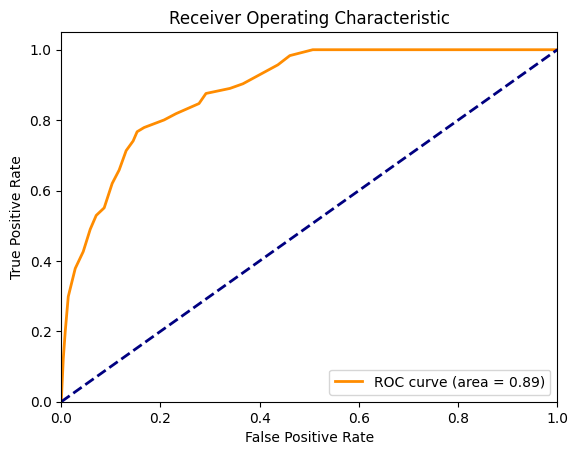

In [247]:
# doing ROC
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [248]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[352, 145],
       [104, 733]])

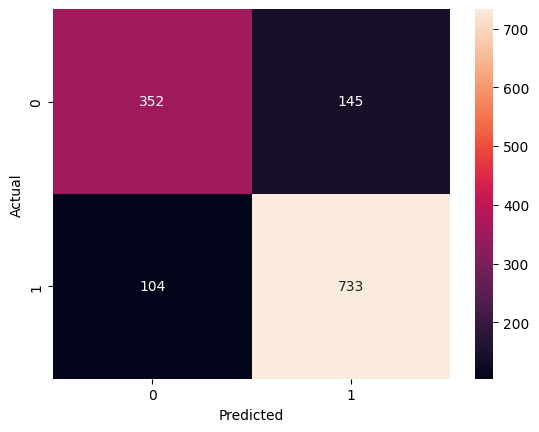

In [249]:
# graphical representation of confusion matrix
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [250]:
#classification report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       497
           1       0.83      0.88      0.85       837

    accuracy                           0.81      1334
   macro avg       0.80      0.79      0.80      1334
weighted avg       0.81      0.81      0.81      1334



In [251]:
#taking input from user and giving prediction
outlook=input("enter outlook")
temperature=input("enter temperature")
humidity=input("enter humidity")
wind=input("enter wind")
label_map={0:'No',1:'Yes'}
predict_value=rf.predict([[outlook,temperature,humidity,wind]])
print(label_map[predict_value[0]])

enter outlook0
enter temperature1
enter humidity1
enter wind1
Yes
